In [1]:
import pandas as pd
file=pd.read_csv("C:/Users/ASUS/data science calss/Social_Network_Ads (1).csv")
df=pd.DataFrame(file)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [22]:
df = pd.get_dummies(df)


In [23]:
x=df.drop(['Purchased'],axis=1)

In [24]:
y=df['Purchased'].values

In [25]:
#splittingthe dataset into the traning set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
#Scalling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [27]:
#fiting svm to the training set
from sklearn.svm import SVC
classifier2=SVC(kernel='rbf',probability= True, random_state=0)
classifier2.fit(x_train,y_train)

SVC(probability=True, random_state=0)

In [28]:
classifier2.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [30]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9125

In [31]:
#making confusion matrix
confusion_matrix(y_test,y_pred)

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [32]:
#classification report
z=classification_report(y_test,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [33]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [21]:
#visualizing the ROC-AUC curve
y_proba=classifier2.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[0.06281743 0.06694282 0.04224041 0.04455732 0.03477552 0.07757722
 0.12521045 0.97863767 0.0463919  0.72560658 0.00893422 0.02098188
 0.03286412 0.22139234 0.11357415 0.72505907 0.05847992 0.1811157
 0.90922269 0.11346185 0.05217458 0.9612342  0.13638832 0.85289118
 0.03496598 0.95884121 0.06011844 0.0334255  0.05244221 0.07873186
 0.19927195 0.11106325 0.92479523 0.04439641 0.01247608 0.0418574
 0.06055971 0.06765384 0.02297475 0.89632457 0.08050148 0.12273421
 0.04944111 0.14560244 0.78829497 0.01210526 0.10778113 0.85038256
 0.02584994 0.8689169  0.9386732  0.10676072 0.07481729 0.86031676
 0.90617199 0.64836931 0.06200117 0.05285552 0.86302221 0.05599976
 0.10828561 0.97350842 0.11570228 0.36756594 0.04663057 0.95181442
 0.1230302  0.00947227 0.12536616 0.15958019 0.94735531 0.07526266
 0.03139329 0.85038324 0.10690743 0.13653023 0.22907771 0.1535253
 0.83416693 0.7512486 ]


In [34]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [35]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9757053291536051


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

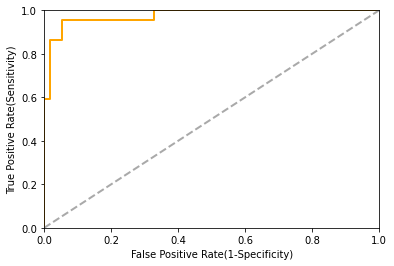

In [36]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')